In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
crim=pd.read_csv('crime_data.csv')

In [4]:
crim.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [7]:
crim.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [8]:
crim.shape

(50, 5)

In [10]:
crim.isnull().any()

Unnamed: 0    False
Murder        False
Assault       False
UrbanPop      False
Rape          False
dtype: bool

In [11]:
df = crim.drop(['Unnamed: 0'], axis=1)
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [12]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [13]:
df_norm=norm_func(df.iloc[:,1:])

In [14]:
df_norm.head()

,Assault,UrbanPop,Rape
0,0.654110,0.440678,0.359173
1,0.746575,0.271186,0.961240
2,0.852740,0.813559,0.612403
3,0.496575,0.305085,0.315245
4,0.791096,1.000000,0.860465


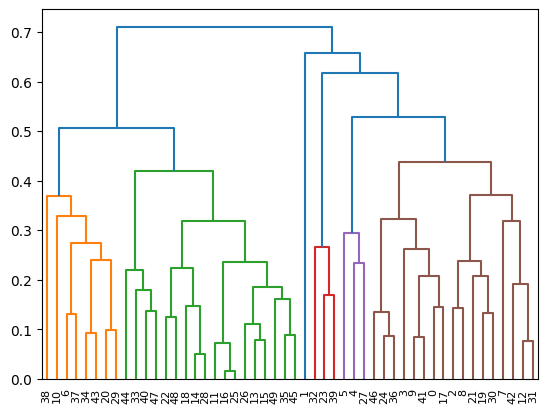

In [15]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [16]:
# create clusters
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [17]:
y_hc=hc.fit_predict(df_norm)
y_hc

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 1, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 1, 1, 2, 1, 1])

In [19]:
df['h_clusterid']=hc.labels_
df

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,0
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,1
8,15.4,335,80,31.9,0
9,17.4,211,60,25.8,1


# **Kmeans**

In [20]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [21]:
crim1=pd.read_csv('crime_data.csv')

In [22]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [23]:
df_norm=norm_func(crim1.iloc[:,1:])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

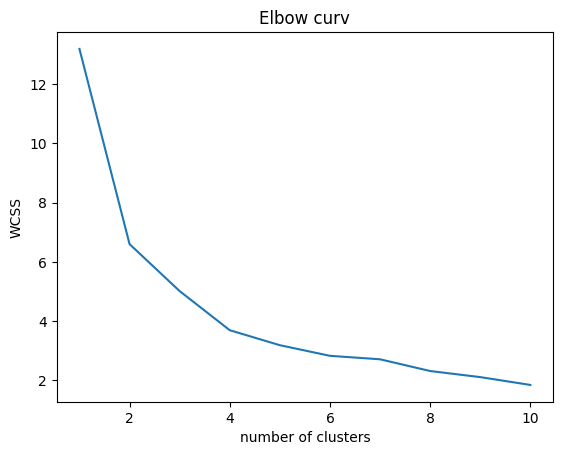

In [24]:
# Elbow curv
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curv')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
# selecting 4 clusters from above scree plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 2, 3, 2, 2, 0, 0, 2, 3, 0, 1, 2, 0, 1, 0, 1, 3, 1, 2, 0, 2,
       1, 3, 2, 1, 1, 2, 1, 0, 2, 2, 3, 1, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0,
       1, 0, 0, 1, 1, 0], dtype=int32)

In [26]:
x=pd.Series(model.labels_)
crim1['Clust']=x

In [27]:
crim1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,2
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,2


In [28]:
crim1.iloc[:,1:5].groupby(crim1.Clust).mean()

,Murder,Assault,UrbanPop,Rape
Clust,,,,
0,5.656250,138.875000,73.875000,18.781250
1,3.600000,78.538462,52.076923,12.176923
2,10.815385,257.384615,76.000000,33.192308
3,13.937500,243.625000,53.750000,21.412500


<Axes: xlabel='Murder', ylabel='Assault'>

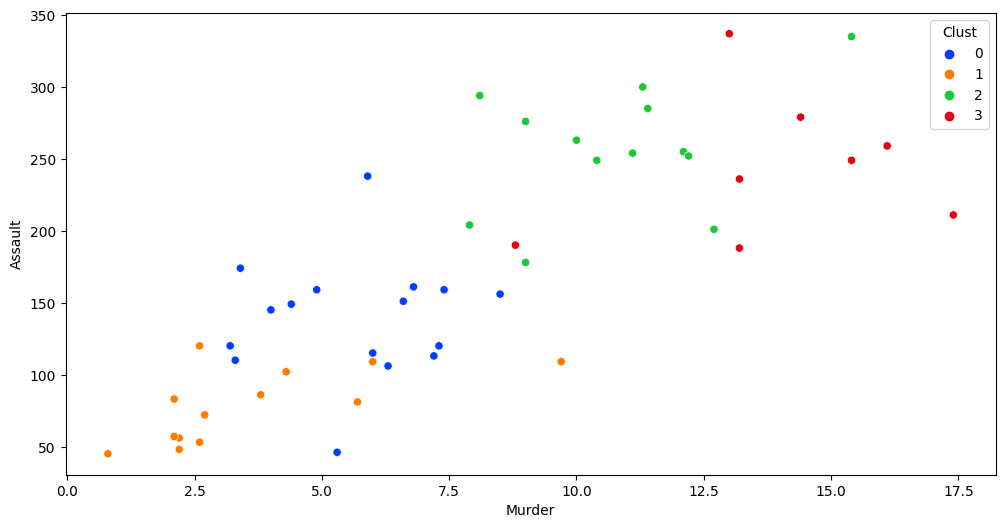

In [30]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_palette("pastel")
sns.scatterplot(x=crim1['Murder'], y = crim1['Assault'], hue=crim1['Clust'], palette='bright')

## DBSCAN

In [31]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [32]:
crim3=pd.read_csv('crime_data.csv')

In [33]:
df2=crim3.iloc[:,1:5]

In [35]:
df2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [38]:
stscaler=StandardScaler().fit(df2.values)
x=stscaler.transform(df2.values)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [39]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [41]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [43]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,-1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [44]:
pd.concat([crim3,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,0
